In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
from utils import euclidean_distance
from batch_generator import batch_hard

In [4]:
P = 3
K = 5

In [5]:
xs, ys = make_blobs(n_samples=100, centers=P, n_features=2)

In [6]:
y_idxs = [np.argwhere(ys == y).reshape(-1) for y in np.unique(ys)]

In [7]:
def plot_blobs(xs, ys, marker='o', include_legend=True):
    for y in np.unique(ys):
        y_idxs = np.argwhere(ys == y).reshape(-1)
        plt.scatter(xs[y_idxs, 0], xs[y_idxs, 1], label=y, marker=marker)
    if include_legend:
        plt.legend()

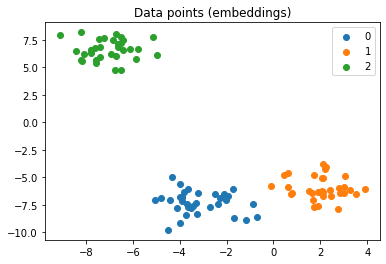

In [8]:
plot_blobs(xs, ys)
plt.title('Data points (embeddings)')
plt.show()

In [9]:
def arranged_idxs_batch(xs, y_idxs, k):
    batch_xs = []
    batch_ys = []
    for y_idx in y_idxs:
        batch_idx = np.random.choice(y_idx, k, replace=False)
        batch_xs.append(xs[batch_idx])
        batch_ys.append(ys[batch_idx])
    batch_xs = np.concatenate(batch_xs, 0)
    batch_ys = np.concatenate(batch_ys)
    return batch_xs, batch_ys

In [10]:
batch_xs, batch_ys = arranged_idxs_batch(xs, y_idxs, K)

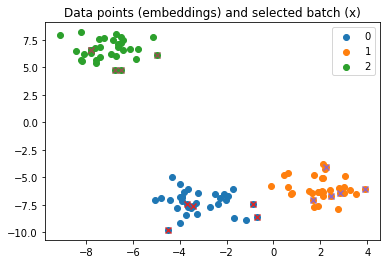

In [11]:
plot_blobs(xs, ys)
plot_blobs(batch_xs, batch_ys, marker='x', include_legend=False)
plt.title('Data points (embeddings) and selected batch (x)')
plt.show()

In [12]:
ed = euclidean_distance(batch_xs, batch_xs)

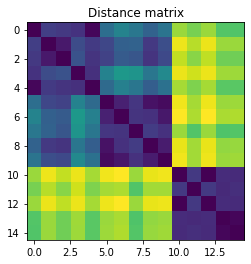

In [13]:
plt.imshow(ed)
plt.title('Distance matrix')
plt.show()

In [14]:
# shuffle labels and features
#p = np.random.permutation(batch_ys.shape[0])
#batch_xs = batch_xs[p]
#batch_ys = batch_ys[p]
#anchors, hard_positives, hard_negatives = batch_hard(batch_xs, batch_ys, P, K)

In [15]:
anchors = batch_xs
hard_positives, hard_negatives = batch_hard(batch_xs, batch_ys)

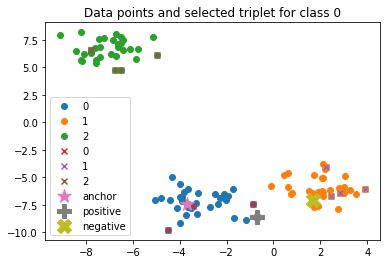

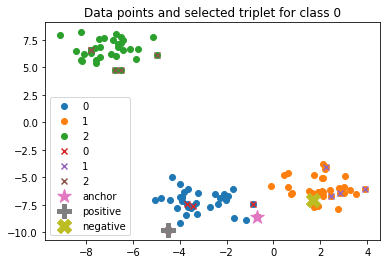

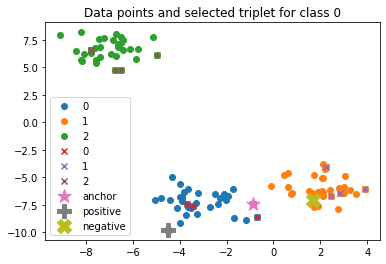

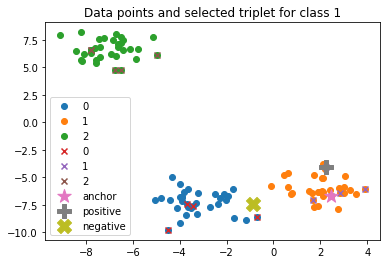

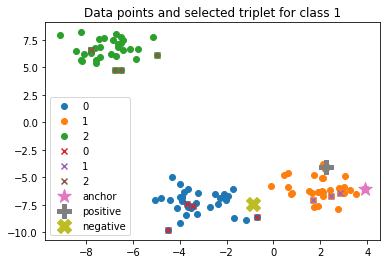

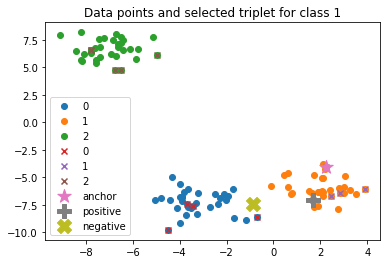

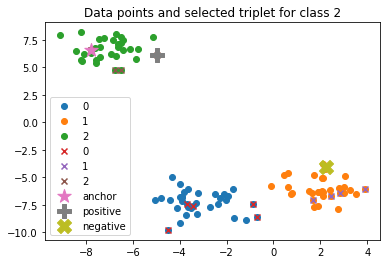

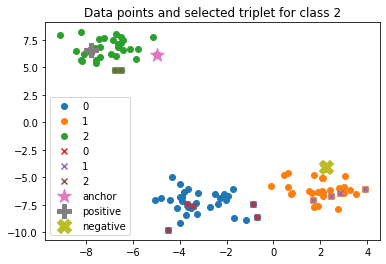

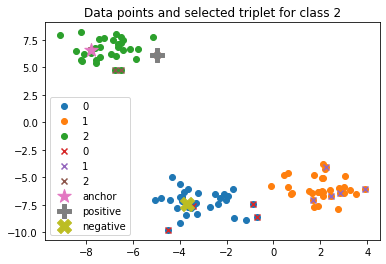

In [16]:
EXAMPLES_PER_CLASS = 3
for y in range(P):
    p_idxs = np.argwhere(batch_ys == y).reshape(-1)
    p_anchors = anchors[p_idxs]
    p_hard_positives = hard_positives[p_idxs]
    p_hard_negatives = hard_negatives[p_idxs]
    for j in range(EXAMPLES_PER_CLASS):
        plot_blobs(xs, ys)
        plot_blobs(batch_xs, batch_ys, marker='x', include_legend=False)
        plt.scatter(p_anchors[j, 0], p_anchors[j, 1], marker='*', s=200, label='anchor')
        plt.scatter(p_hard_positives[j, 0], p_hard_positives[j, 1], marker='P', s=200, label='positive')
        plt.scatter(p_hard_negatives[j, 0], p_hard_negatives[j, 1], marker='X', s=200, label='negative')
        plt.title(f'Data points and selected triplet for class {y}')
        plt.legend()
        plt.show()

# TODO

* choose one of the hard positives/negatives randomly to reduce overfitting (because of identical triplets, see identical_triplets.png)
* use pytorch (CUDA) to calculate distance